In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch

In [2]:
import src.models_zoo.segmentation.unet as unet

In [3]:
from albumentations import *
from albumentations.pytorch import ToTensor
import numpy as np
import cv2
import random


def pre_transform(resize):
    transforms = []
    transforms.append(Resize(resize, resize))
    return Compose(transforms)

def post_transform():
    return Compose([
        Normalize(
            mean=(0.485),
            std=(0.229)),
        ToTensor()
    ])


def test_transform(resize):
    return Compose([
        pre_transform(resize=resize),
        post_transform()]
    )


In [4]:
device = torch.device('cuda:3')

In [5]:
model = unet.UNet(n_channels=3, n_classes=1).to(device)

In [6]:
model.load_state_dict(torch.load("../weights/Unet2d/0/tt_1_0.88649.pt")\
                       ["state_dict"])

In [7]:
def read_tiff_file_frame(path, frame):
    image = Image.open(path)
    image.seek(frame)
    return np.array(image.convert("RGB"))

def encode_segmentation_map(image):
    n_classes = 2
    label_colors = np.array([(0, 0, 0),  # 0=background
                             (255, 0, 0)  # 1=TIRADS
                             ])

    labels_map = np.zeros(image.shape[:2])

    for class_label in range(n_classes):
        indices = (image == label_colors[class_label])[:, :, 0]
        labels_map[indices] = class_label

    return labels_map

In [8]:
df = pd.read_csv("~/data/ibespalov/endocrinology/dataset.csv")

In [10]:
df_new = df[df.index < 43]
df_new

,Image,Mask,Frame,fold
0,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,0,0
1,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,1,1
2,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,2,2
3,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,3,3
4,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,4,4
5,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,5,5
6,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,6,6
7,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,7,7
8,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,8,8
9,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,9,9


In [33]:
df_new = df[df['fold'] == 0]

In [34]:
df_new.reset_index(inplace=True)
df_new.head(5)

,index,Image,Mask,Frame,fold
0,0,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,0,0
1,10,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,10,0
2,20,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,20,0
3,30,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,30,0
4,40,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,40,0


In [157]:
df_new.head(5)

,index,Image,Mask,Frame,fold
0,0,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,0,0
1,10,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,10,0
2,20,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,20,0
3,30,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,30,0
4,40,./data/Пациент №11/Images/I0000006.tif,./data/Пациент №11/Masks/I0000006.labels.tif,40,0


In [35]:
len(df_new)

179

In [46]:
img_array = []
mask_array = []
predicted_array = []

In [47]:
for i in range(43):
    img_path, img_frame = df_new.loc[i, 'Image'], df_new.loc[i, 'Frame']
    mask_path, mask_frame = df_new.loc[i, 'Mask'], df_new.loc[i, 'Frame']

    img = read_tiff_file_frame(path=os.path.join("../../../data/ibespalov/endocrinology/",\
                                               img_path), frame=img_frame)

    mask = encode_segmentation_map(read_tiff_file_frame(path=os.path.join("../../../data/ibespalov/endocrinology/",\
                                                                         mask_path), frame=img_frame)) 

    dict_transfors = test_transform(512)(image=img, mask=mask)
    transformed_image = dict_transfors['image']#.permute(2, 0, 1)
    transformed_mask = dict_transfors['mask']
    resized_img = Resize(512,512)(image=img)['image']
    
    prediction = model(transformed_image[None,...].to(device))[0,0,:,:].cpu().detach().numpy()
    img_array.append(resized_img)#np.transpose(resized_img, (1,2,0)))
    mask_array.append(transformed_mask[0].cpu().detach().numpy())
    predicted_array.append(prediction)

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:131: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [29]:
img.shape

(735, 975, 3)

In [31]:
mask_array[0].shape

torch.Size([1, 512, 512])

In [48]:
img_array[0].shape

(512, 512, 3)

In [38]:
img_array[0].shape

(512, 3, 512)

In [26]:
import imageio

In [49]:
imageio.mimsave('./img_array.gif', img_array)
imageio.mimsave('./mask_array.gif', mask_array)
imageio.mimsave('./predicted_array.gif', predicted_array)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [-61.71797561645508, 14.08736801147461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-60.984737396240234, 13.512414932250977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-61.802879333496094, 14.167627334594727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-62.93742752075195, 14.18132209777832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-63.01200866699219, 13.86801528930664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-61.51929473876953, 12.95046615600586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-59.64963150024414, 10.44029617309570

In [12]:
dict_transfors = test_transform(512)(image=img, mask=mask)
transformed_image = dict_transfors['image']#.permute(2, 0, 1)
transformed_mask = dict_transfors['mask']
resized_img = Resize(512,512)(image=img)['image']
prediction = model(transformed_image[None,...].to(device))[0,0,:,:].cpu().detach().numpy()

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:131: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


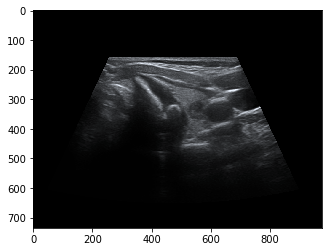

In [13]:
imgplot = plt.imshow(img)
plt.show()

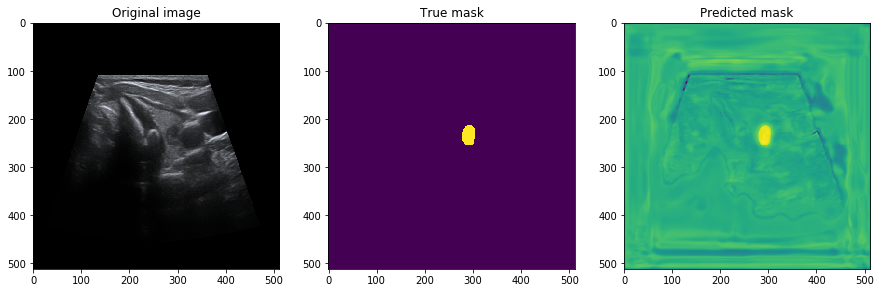

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 7))
ax[0].set_title('Original image')
ax[1].set_title('True mask')
ax[2].set_title('Predicted mask')
ax[0].imshow(resized_img)
#ax[0].imshow(np.array(transformed_image.permute(1,2,0)))
ax[1].imshow(np.array(transformed_mask[0, ...]))
ax[2].imshow(prediction)